In [2]:
def get_patient_train_files(patient_no, data_dir='../../data'):
    """
    returns array of tuples (patient_no, train_data_idx, seiz_stage_class, path_to_mat_file)
    for given patient number
    """
    import os
    train_dir = os.path.join(data_dir, "train_{}".format(patient_no))
    filenames = os.listdir(train_dir)
    interm = ((os.path.splitext(f)[0].split("_"), os.path.join(train_dir, f)) for f in filenames)
    return [(int(p[0][0]), int(p[0][1]), int(p[0][2]), p[1]) for p in interm]

In [3]:
def get_patient_test_files(patient_no, data_dir='../../data'):
    """
    returns array of tuples (patient_no, train_data_idx, path_to_mat_file)
    for given patient number
    """
    import os
    train_dir = os.path.join(data_dir, "test_{}_new".format(patient_no))
    filenames = os.listdir(train_dir)
    interm = ((os.path.splitext(f)[0].split("_"), os.path.join(train_dir, f)) for f in filenames)
    return [(int(p[0][1]), int(p[0][2]), p[1]) for p in interm]

In [28]:
def read_mat_file(filepath):
    import pandas as pd
    from scipy.io import loadmat
    mat = loadmat(filepath)
    names = mat['dataStruct'].dtype.names
    ndata = {n: mat['dataStruct'][n][0, 0] for n in names}
    sequence = -1
    if 'sequence' in names:
        sequence = mat['dataStruct']['sequence']
    
    return pd.DataFrame(ndata['data'], columns=ndata['channelIndices'][0]).rolling(window=22).mean().dropna(), sequence

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_patient_data(df, ax=plt):
    fig = plt.figure(figsize=(20,12))
    cols_num = len(df.columns)
    for i in range(1, cols_num + 1):    
        ax.subplot(cols_num, 1, i)
        ax.plot(df.index, df[df.columns[i - 1]].as_matrix(), 'k-')

In [7]:
def hist_patient_data(df, cls, col, ax=plt):
    ax.set_title('{}, electrode = {}'.format('interictal' if cls == 0 else 'preictal', col))
    ax.hist(df[col].as_matrix(), bins=200)

In [8]:
def hist_patient_data_sum(df, cls, ax=plt):
    ax.axis([-300, 300, 0, 50000])
    if (cls == 0):
        ax.set_title('interical sum')
    elif (cls == 1):
        ax.set_title('preictal sum')
    ax.hist(df.sum(axis=1).as_matrix(), bins=100)

In [9]:
train_files_1 = get_patient_train_files(1)
train_1_0 = [x for x in train_files_1 if x[2] == 0]
train_1_1 = [x for x in train_files_1 if x[2] == 1]
print(len(train_1_0))
print(len(train_1_1))
print(len(train_files_1))

1152
150
1302


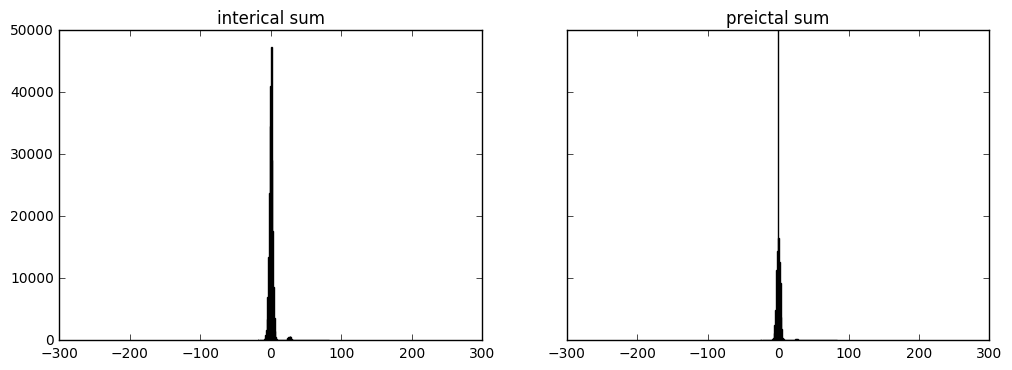

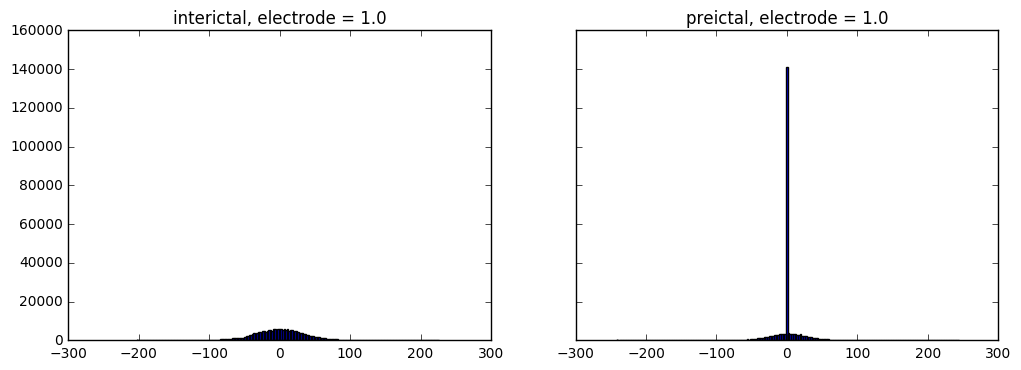

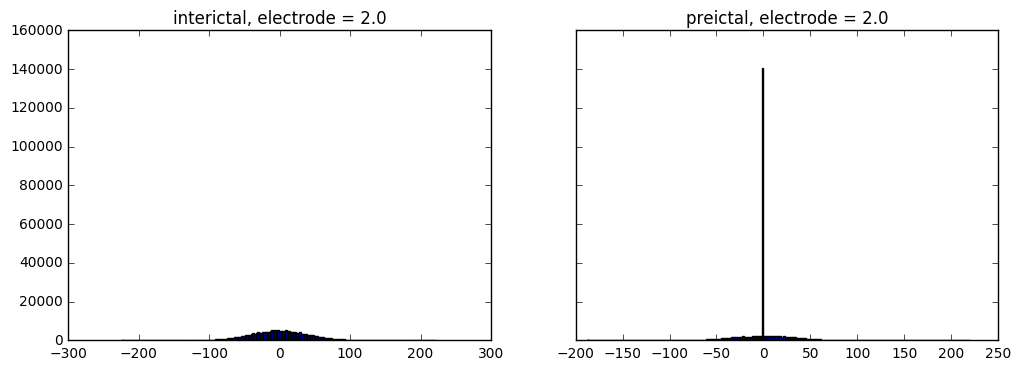

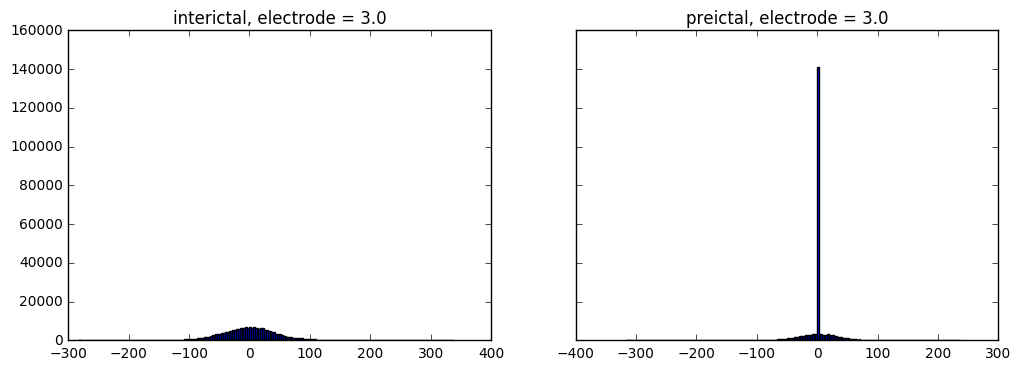

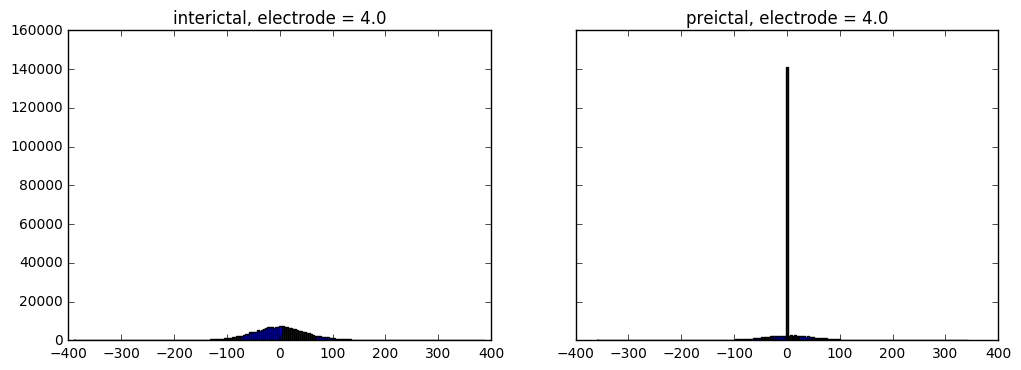

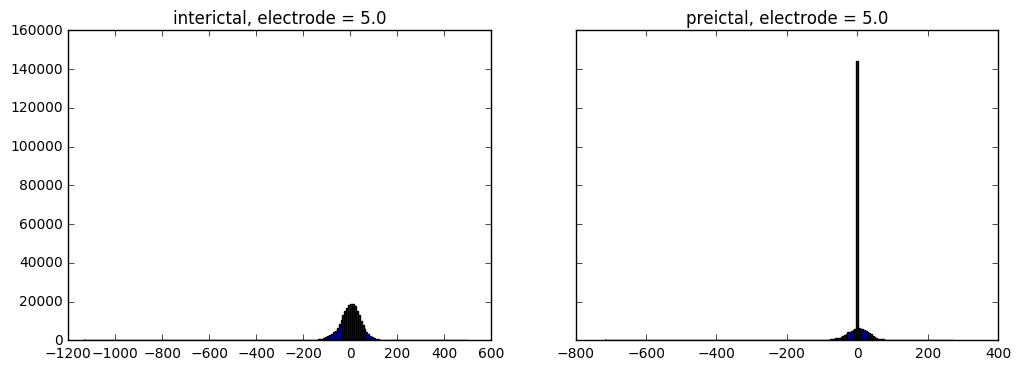

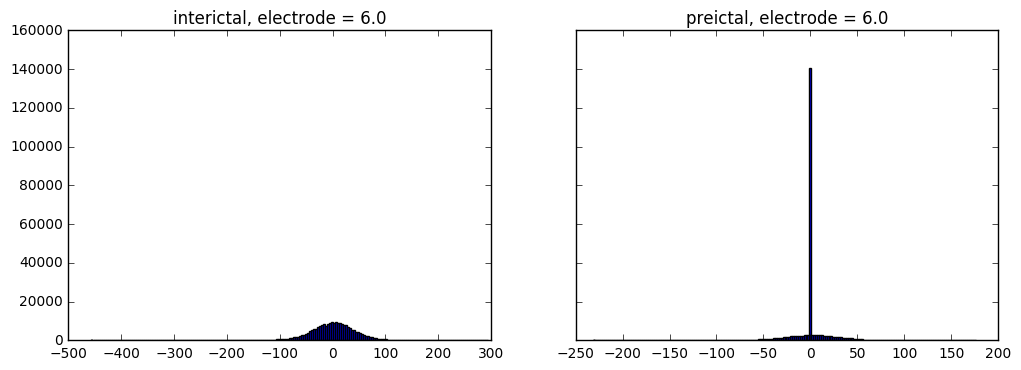

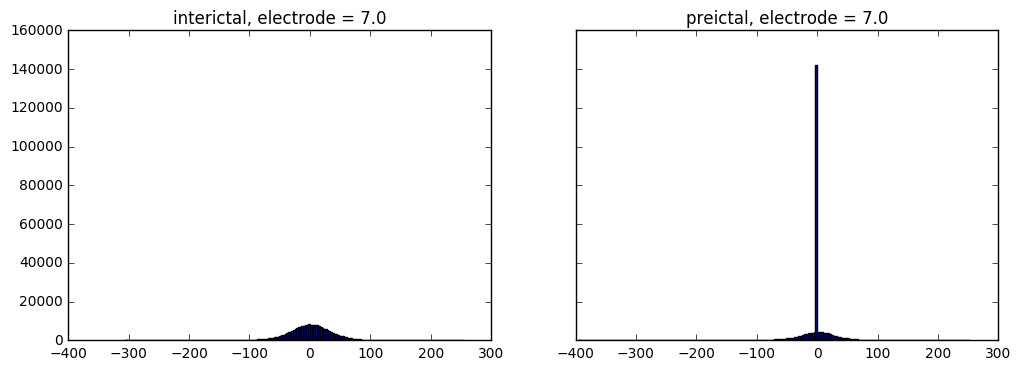

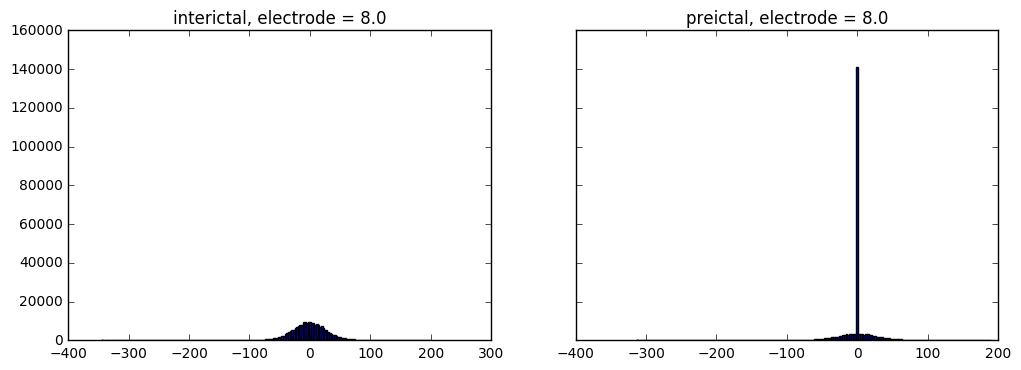

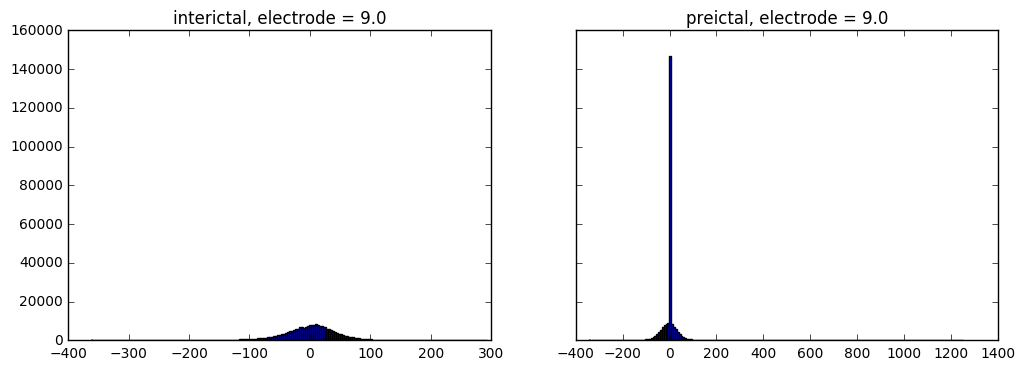

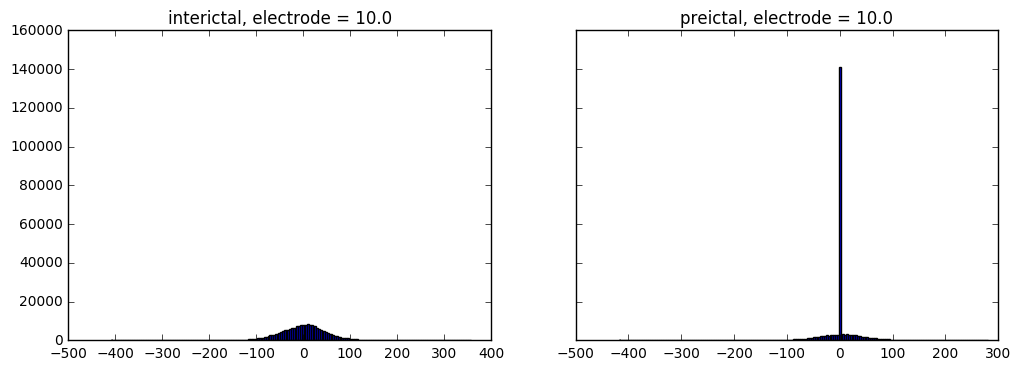

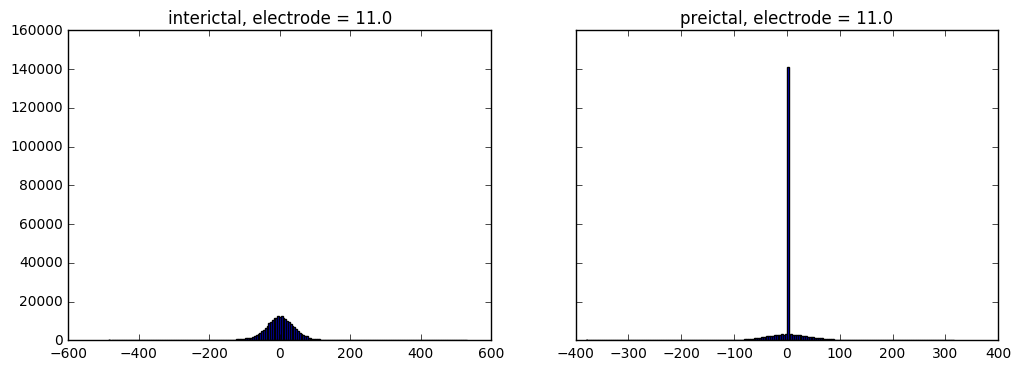

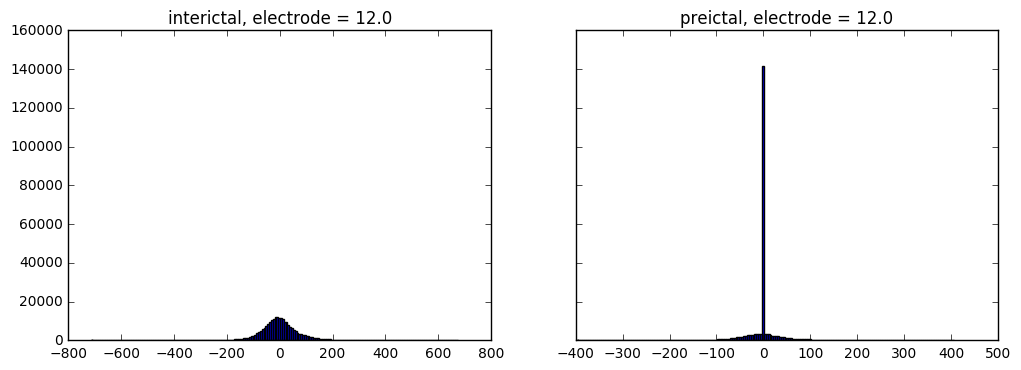

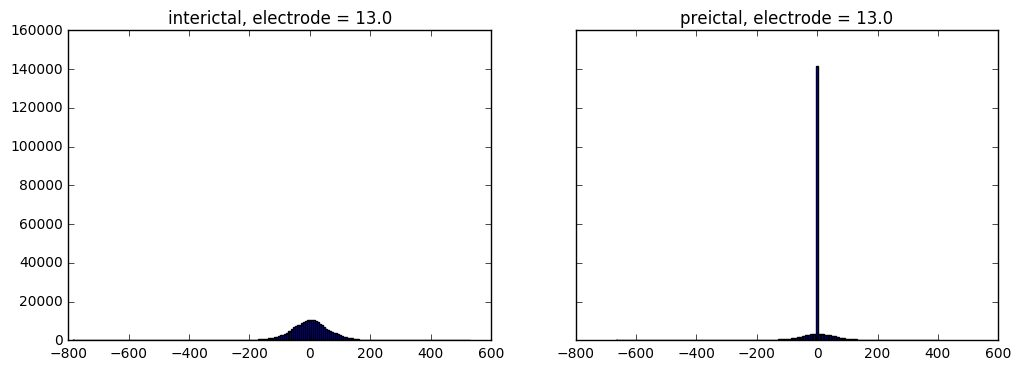

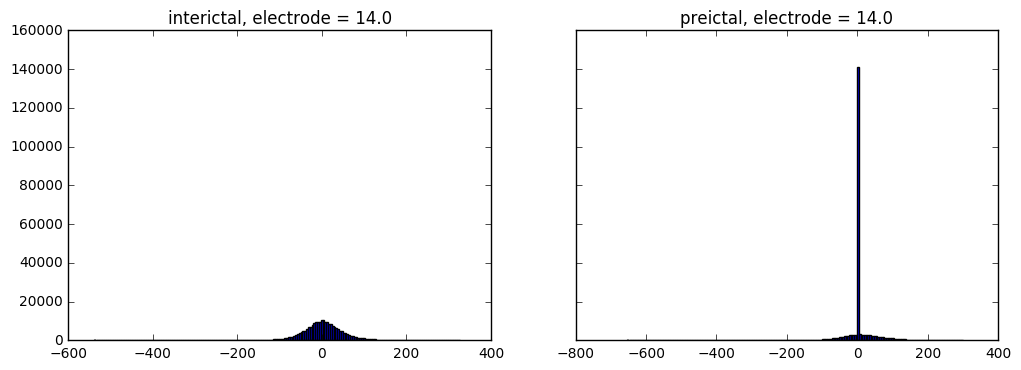

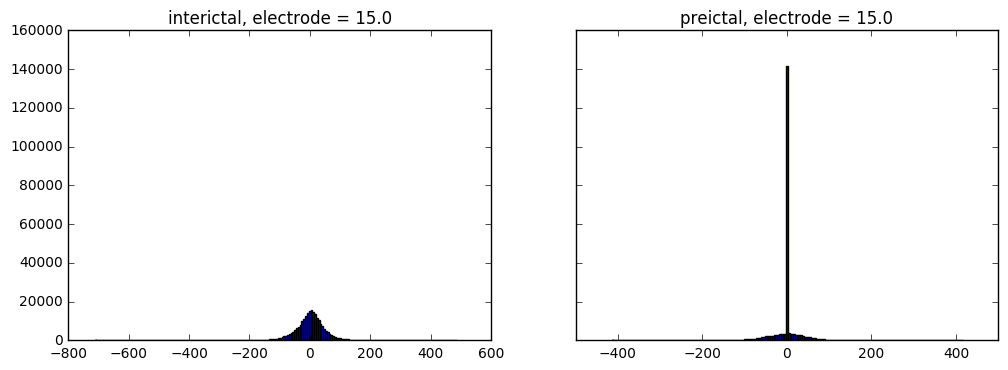

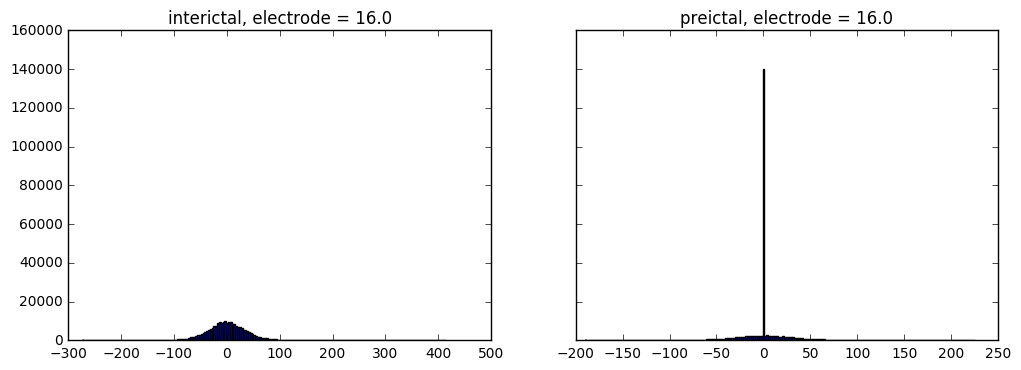

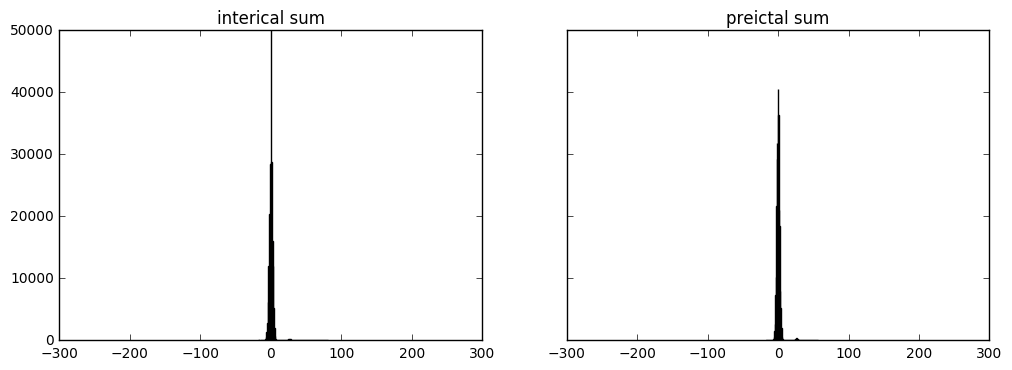

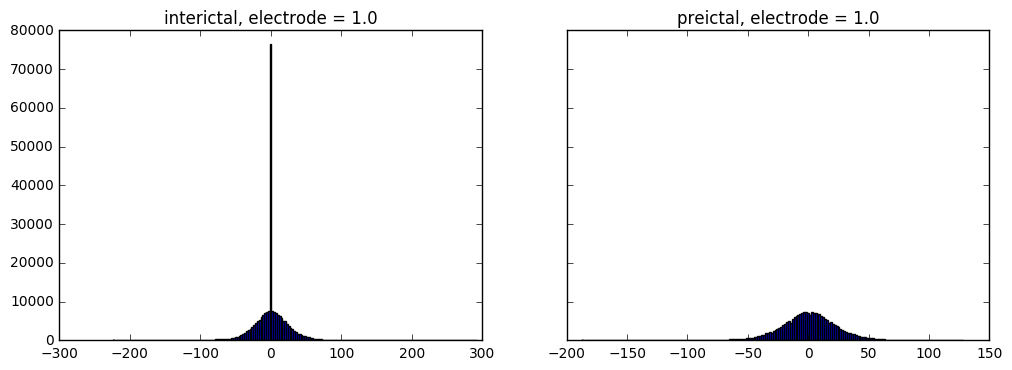

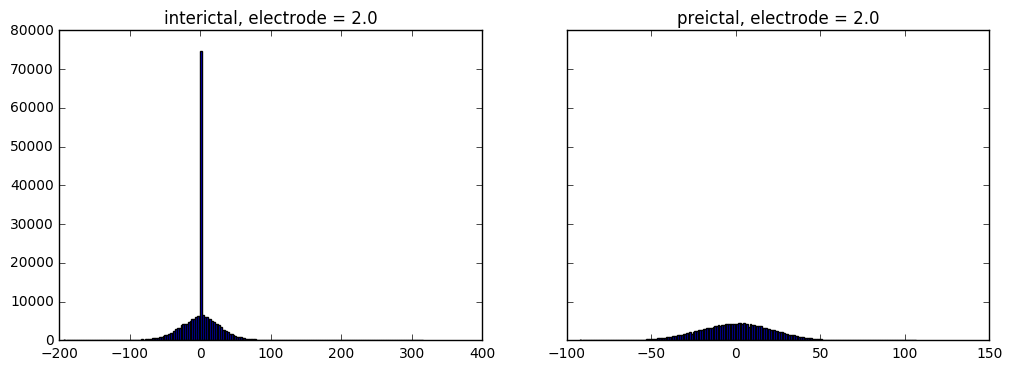

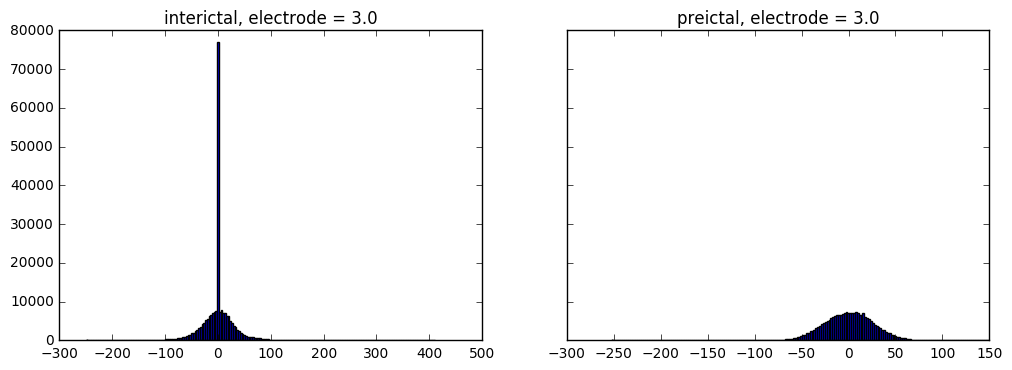

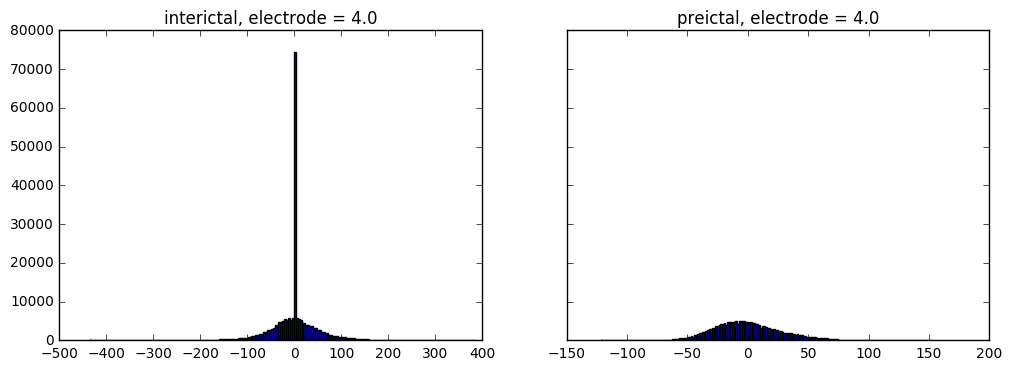

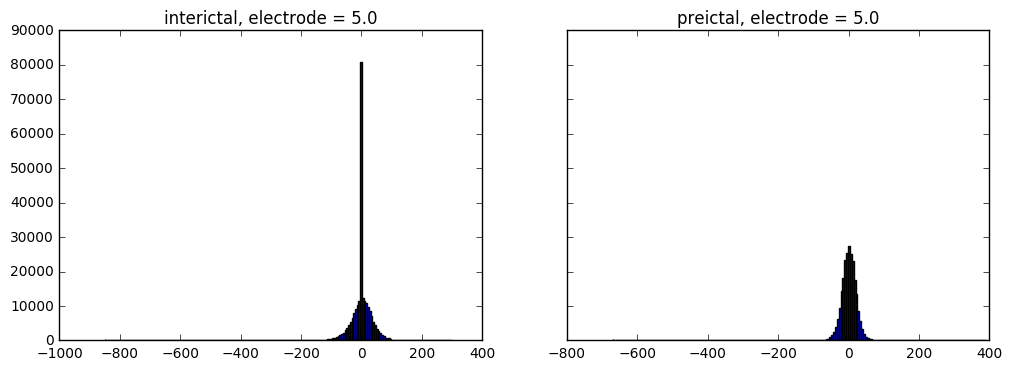

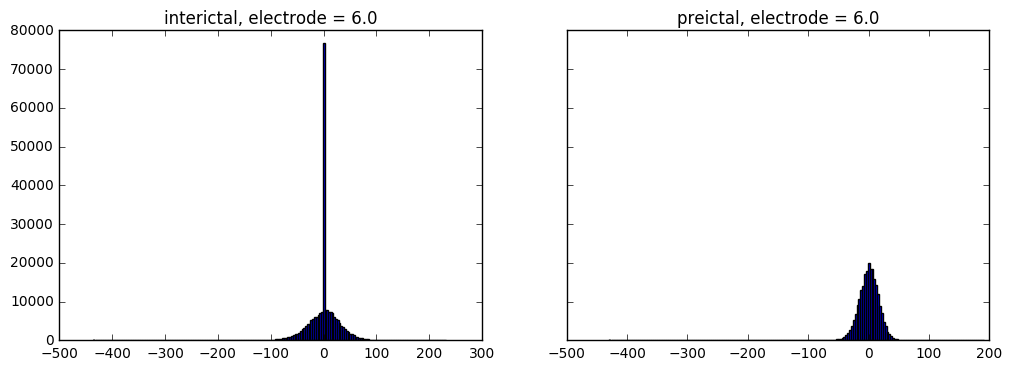

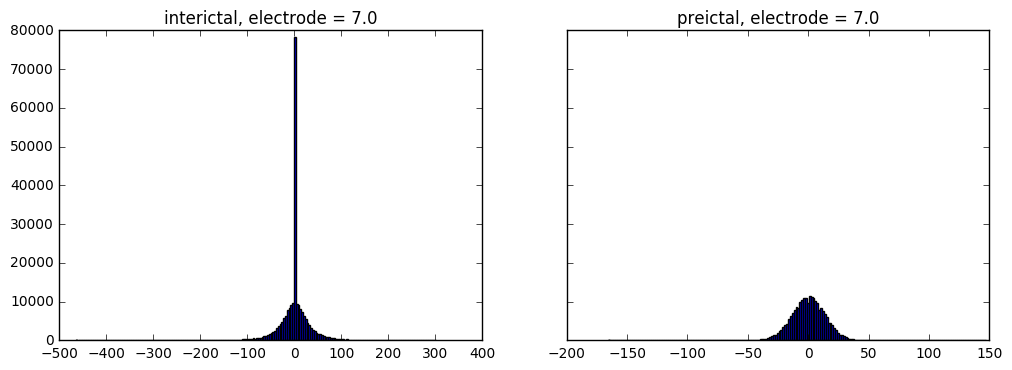

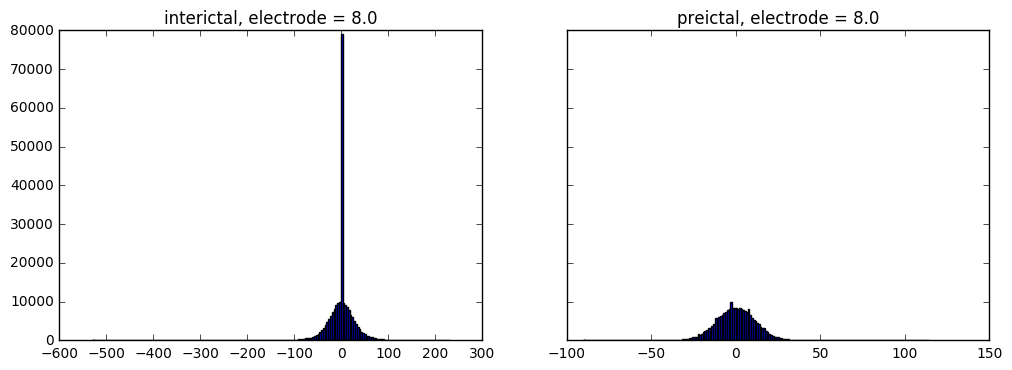

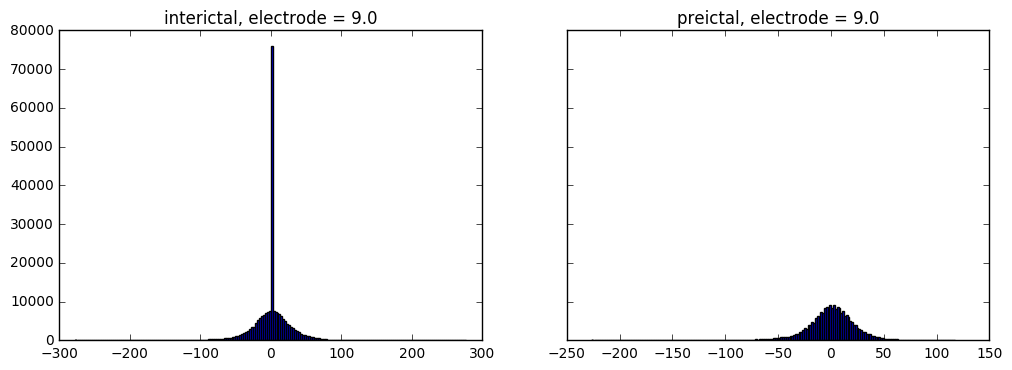

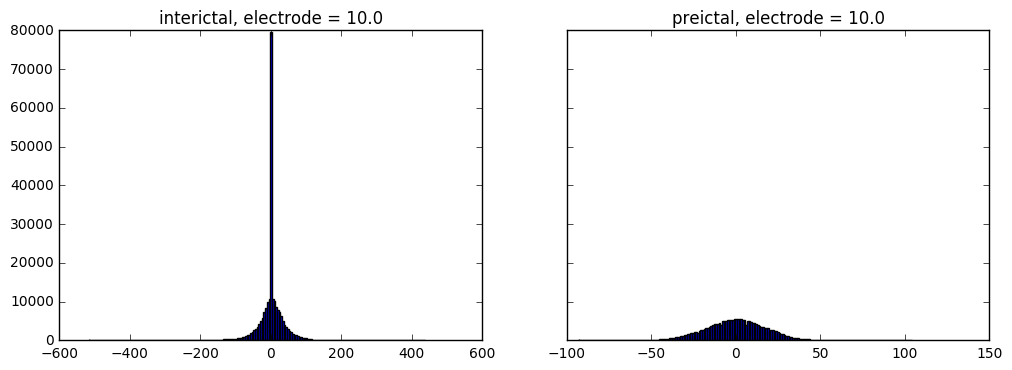

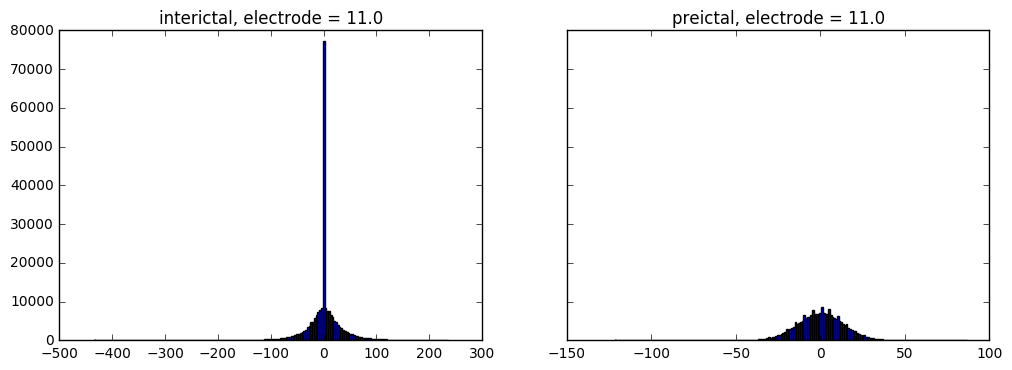

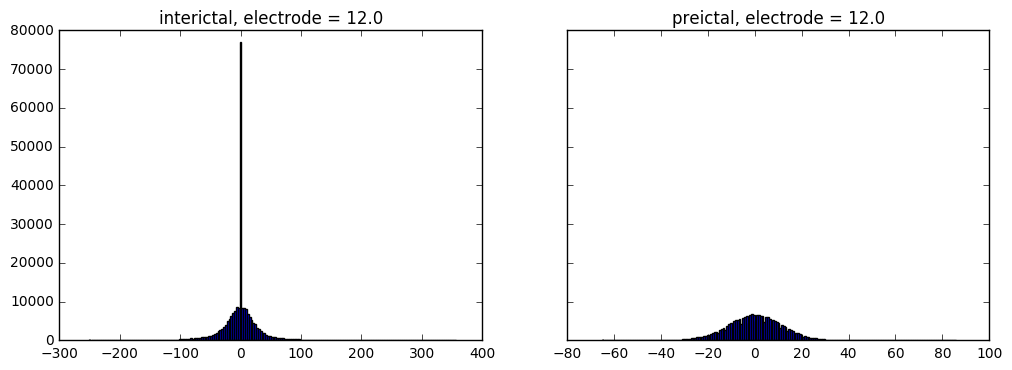

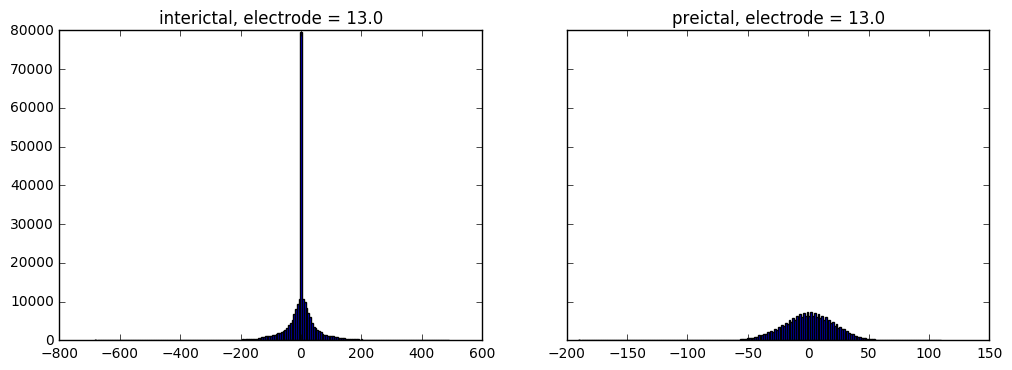

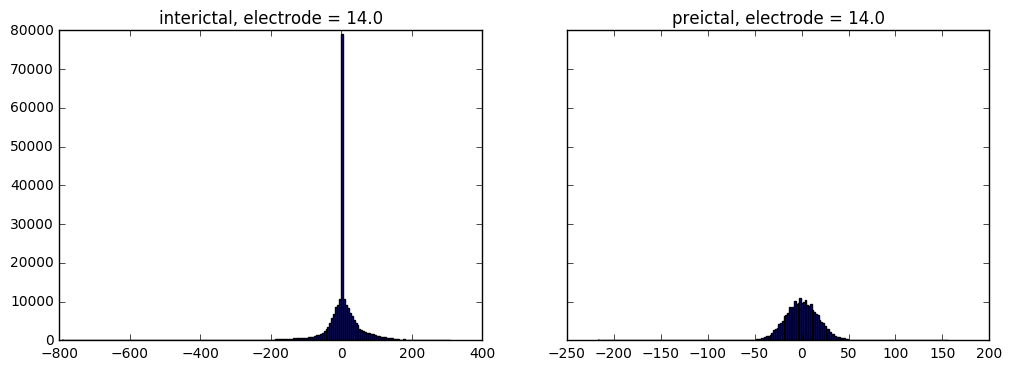

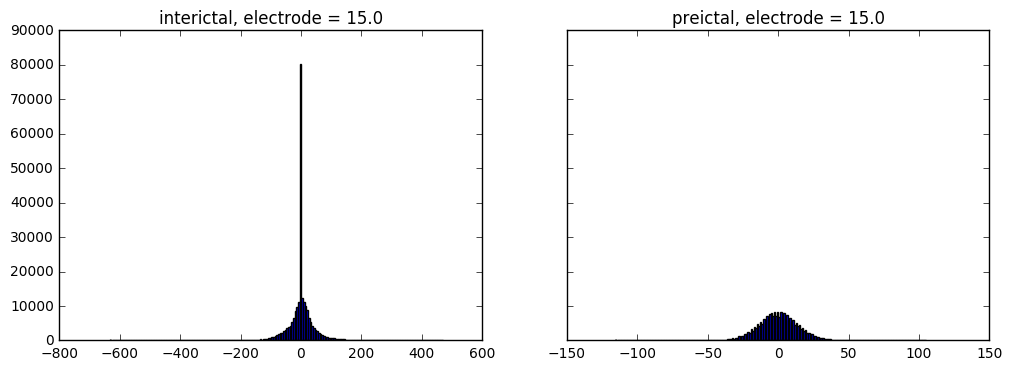

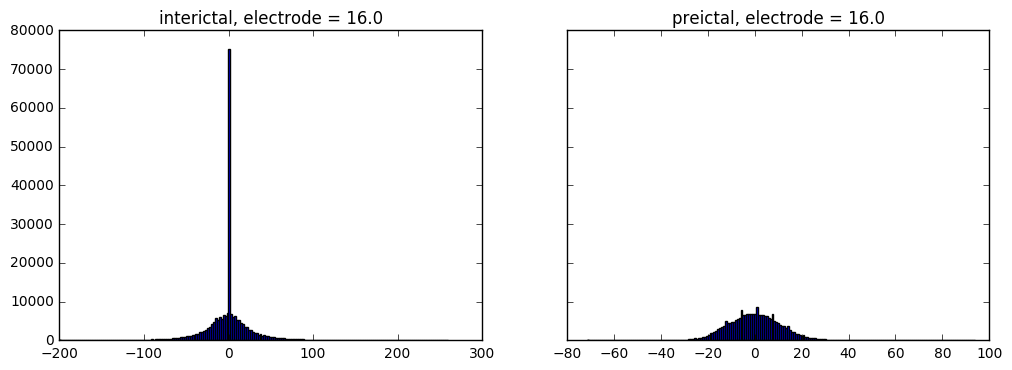

In [11]:
n = 2
for i in range(n):
    df_0, _ = read_mat_file(train_1_0[i][3])
    df_1, _ = read_mat_file(train_1_1[i][3])
    f1, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row')
    f1.set_figwidth(12)
    hist_patient_data_sum(df_0, 0, ax=ax1)
    hist_patient_data_sum(df_1, 1, ax=ax2)
    plt.show()
    
    col_num = len(df_0.columns)
    for j in range(col_num):
        f2, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row')
        f2.set_figwidth(12)
        hist_patient_data(df_0, 0, df_0.columns[j], ax=ax1)
        hist_patient_data(df_1, 1, df_1.columns[j], ax=ax2)
        plt.show()

In [1]:
import numpy as np

read 0
read 1


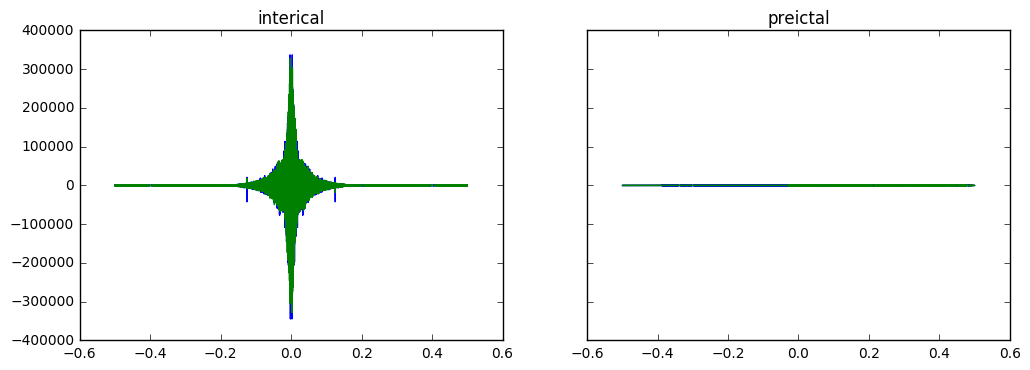

KeyboardInterrupt: 

In [ ]:
n = 5
for i in range(n):
    df_0, _ = read_mat_file(train_1_0[i][3])
    print("read 0")
    df_1, _ = read_mat_file(train_1_1[i][3])
    print("read 1")
    col_num = len(df_0.columns)
    for j in range(col_num):
        fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row')
        fig.set_figwidth(12)
        sp_0 = np.fft.fft(df_0[df_0.columns[j]].as_matrix())
        freq_0 = np.fft.fftfreq(df_0.shape[0])
        ax1.set_title('interical')
        ax1.plot(freq_0, sp_0.real, 'b', freq_0, sp_0.imag, 'g')
        sp_1 = np.fft.fft(df_1[df_1.columns[j]].as_matrix())
        freq_1 = np.fft.fftfreq(df_1.shape[0])
        ax2.set_title('preictal')
        ax2.plot(freq_1, sp_1.real, 'b', freq_1, sp_1.imag, 'g')
        plt.show()

In [32]:
df, _ = read_mat_file(train_1_0[0][3])

In [41]:
fft = np.fft.fft(df, axis=0)

In [44]:
abs(fft).shape

(239979, 16)

In [45]:
fft.shape

(239979, 16)

In [41]:
np.fft.fft(df[3])

array([ 35920.07246988    +0.j        ,  62567.41877273 +6939.76529572j,
        -7831.94782019+29195.37441063j, ...,
        33984.51618089+37850.03131461j,  -7831.94782019-29195.37441063j,
        62567.41877272 -6939.76529572j])

In [67]:
fft = np.fft.fft(df, axis=0)

In [71]:
fft.shape

(240000, 16)

In [73]:
len(np.std(fft, axis=0))

16

reading
(239979, 16)
summing
0...
1...


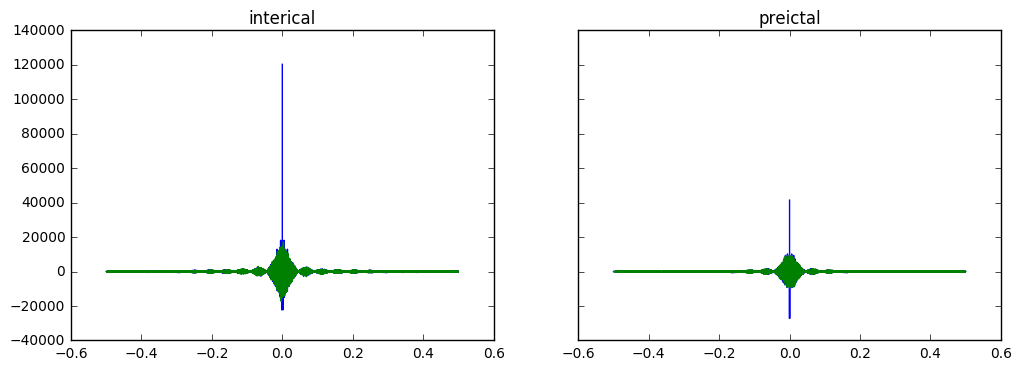

reading
(239979, 16)
summing
0...
1...


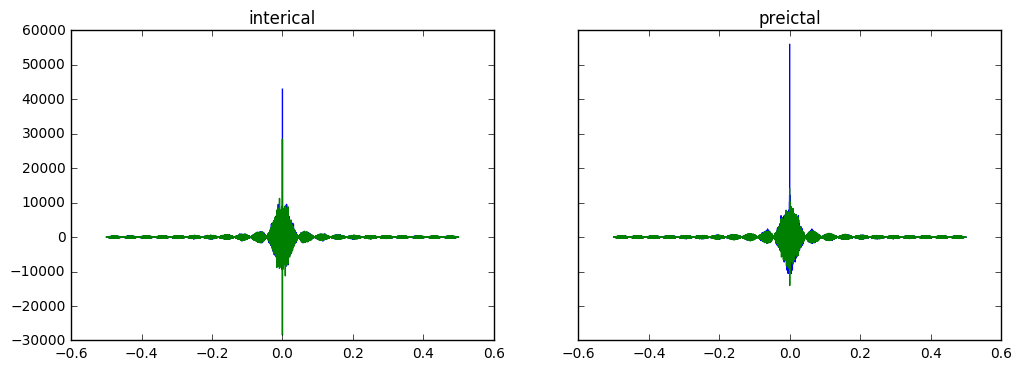

In [29]:
n = 2
for i in range(n):
    print("reading")
    df_0, _ = read_mat_file(train_1_0[i][3])
    df_1, _ = read_mat_file(train_1_1[i][3])
    print(df_0.shape)
    print("summing")
    sum_0 = df_0.sum(axis=1).as_matrix()
    sum_1 = df_1.sum(axis=1).as_matrix()
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row')
    fig.set_figwidth(12)
    print("0...")
    sp_0 = np.fft.fft(sum_0)
    freq_0 = np.fft.fftfreq(len(sum_0))
    ax1.set_title('interical')
    ax1.plot(freq_0, sp_0.real, 'b', freq_0, sp_0.imag, 'g')
    sp_1 = np.fft.fft(sum_1)
    print("1...")
    freq_1 = np.fft.fftfreq(len(sum_1))
    ax2.set_title('preictal')
    ax2.plot(freq_1, sp_1.real, 'b', freq_1, sp_1.imag, 'g')
    plt.show()

In [80]:
import pandas as pd
df.rolling(window=5).mean().dropna()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
4,-2.127941,5.038839,-72.485991,52.166208,-9.414035,17.312379,33.239500,33.093233,48.729028,-57.837126,-7.137763,-5.312759,-111.997691,68.854472,10.735927,-3.681174
5,2.272059,8.638839,-73.285991,52.366208,-8.014035,17.312379,29.239500,29.293233,50.729028,-58.837126,-8.137763,-6.312760,-112.997691,69.254472,11.135927,-3.681174
6,9.272059,14.638839,-74.885991,52.566208,-7.214035,16.312379,25.039500,25.093233,52.129028,-60.037126,-9.937763,-8.312760,-114.597691,69.454472,11.735927,-3.481174
7,16.072059,17.438839,-74.685991,54.766208,-7.614035,14.112379,21.239500,21.293234,52.329028,-62.037126,-10.937763,-8.712760,-114.197691,70.454472,12.535927,-2.681174
8,21.472059,17.238839,-74.085991,57.166208,-7.814035,12.512379,18.039500,18.493233,51.929028,-65.037126,-12.737763,-8.712760,-113.197691,71.654472,13.135927,-1.081174
9,26.072059,16.238839,-73.285991,59.766208,-7.014035,10.112380,15.239500,16.093233,50.729028,-67.037126,-14.737763,-8.512760,-111.197691,72.854472,13.935927,0.118826
10,30.672059,13.638839,-72.085991,61.166208,-5.814035,7.912380,14.039500,14.293233,49.329028,-69.237126,-16.737763,-8.712760,-108.397691,73.454472,14.135927,0.918826
11,33.272058,12.038839,-68.885991,61.766208,-4.214035,5.512380,14.639500,13.693233,48.729028,-71.637126,-19.137763,-7.912760,-103.597691,72.454472,12.735927,-0.281174
12,36.272058,16.038838,-64.485991,59.966208,-3.814035,2.512380,15.439500,13.493233,48.529028,-74.237126,-21.737762,-7.512760,-99.797691,69.454472,10.935927,-1.881174
13,40.272058,23.838838,-59.885991,56.766208,-2.614035,-0.287620,16.239500,12.893233,47.129028,-76.237126,-23.537762,-7.512760,-97.397691,65.254472,8.935927,-4.081174


In [49]:
sum_signal = df.sum(axis=1).as_matrix()
        sum_std = np.std(sum_signal)
        sum_mean = np.mean(sum_signal)
        sum_perc_30 = np.percentile(df, 30)
        sum_perc_70 = np.percentile(df, 70)

In [50]:
sum_perc_70

20.381055398420855

In [51]:
np.array([sum_std, sum_mean, sum_perc_30]).flatten()

array([  2.60025009,   0.50145639, -19.96187912])

In [61]:
std = np.std(df.as_matrix(), axis=0)

In [70]:
std

array([ 35.06311599,  42.0129066 ,  48.32249739,  57.74720621,
        47.4380735 ,  44.46439456,  35.70341046,  30.01378419,
        46.4887183 ,  48.35365031,  48.57660794,  80.30201994,
        68.69204349,  53.36150893,  55.75303752,  40.33167225])

In [74]:
np.concatenate(([sum_std], std))

array([  2.60025009,  35.06311599,  42.0129066 ,  48.32249739,
        57.74720621,  47.4380735 ,  44.46439456,  35.70341046,
        30.01378419,  46.4887183 ,  48.35365031,  48.57660794,
        80.30201994,  68.69204349,  53.36150893,  55.75303752,  40.33167225])

In [73]:
sum_std

2.6002500929533712

In [83]:
dct = {'cls': 1, 'features': np.array([1,2,3])}

In [84]:
dct

{'cls': 1, 'features': array([1, 2, 3])}

In [85]:
dct['features']

array([1, 2, 3])

In [86]:
import pandas as pd

In [94]:
df = pd.DataFrame(dct)

In [96]:
df.head()

,cls,features
0,1,1
1,1,2
2,1,3


In [97]:
df.append(dct)

TypeError: Can only append a Series if ignore_index=True or if the Series has a name

In [98]:
df_0 = pd.DataFrame()

In [99]:
df

,cls,features
0,1,1
1,1,2
2,1,3


In [103]:
df_0 = df_0.append(df)

In [104]:
df_0

,cls,features
0,1,1
1,1,2
2,1,3


In [106]:
df_0.drop(['cls'], axis=1)

,features
0,1
1,2
2,3


In [108]:
df_0['cls'].head()

0    1
1    1
2    1
Name: cls, dtype: int64

In [109]:
df_0[['cls', 'features']]

,cls,features
0,1,1
1,1,2
2,1,3
